In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline

In [34]:
df = pd.read_excel('ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
column_names = {'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area',
             'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation',
             'X7': 'Glazing Area', 'X8': 'Glazing_Area_Distribution', 'Y1':'Heating_Load',
             'Y2': 'Cooling_Load'}

In [5]:
df = df.rename(columns = column_names)

In [9]:
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state = 2)

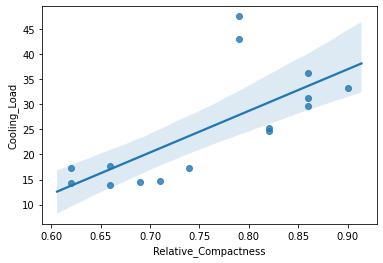

In [10]:
sns.regplot(x = 'Relative_Compactness', y = 'Cooling_Load', data = simple_linear_reg_df)

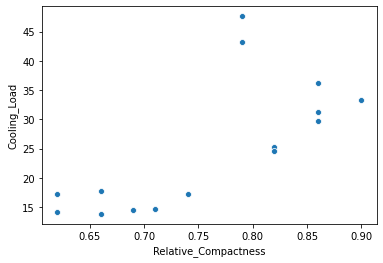

In [11]:
sns.scatterplot(simple_linear_reg_df['Relative_Compactness'], simple_linear_reg_df['Cooling_Load'])

In [16]:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = norm_df.drop(columns = ['Heating_Load', 'Cooling_Load'])
heating_target = norm_df['Heating_Load']

x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)
mae = mean_absolute_error(y_test, predicted_values)
mae

0.06296742865143842

In [17]:
rss = np.sum(np.square(y_test-predicted_values))
rss

1.816691850708439

In [30]:
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

ridge_reg = Ridge(0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [31]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

In [32]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on = 'Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482
